In [1]:
%%time
import importlib
import pipeline
importlib.reload(pipeline)

cnd = pipeline.CND()

print([name for name in cnd.nlp.pipe_names])

['tagger', 'parser', 'ner', 'Named Entity Matcher', 'merge_entities', 'Concept Matcher']
Wall time: 26.7 s


In [2]:
%%time
import os
import importlib
import cndobjects
importlib.reload(cndobjects)


dirpath = r'C:\\Users\\Steve\\OneDrive - University of Southampton\\CNDPipeline\\dataset'

orators = cndobjects.Dataset(cnd, dirpath)

# text = "On my orders, the United States military has begun strikes against Al Qaeda terrorist training camps and military installations of the Taliban regime in Afghanistan."
# doc = cnd(text)

parsing:  hitler (2020-06-30) MeinKampfv2
parsing:  bush (2001-09-11) 911 Address to the Nation
parsing:  bush (2001-09-14) Remarks at the National Day of Prayer & Remembrance Service
parsing:  bush (2001-09-15) First Radio Address following 911
parsing:  bush (2001-09-17) Address at Islamic Center of Washington, D.C.
parsing:  bush (2001-09-20) Address to Joint Session of Congress Following 911 Attacks
parsing:  bush (2001-10-07) Operation Enduring Freedom in Afghanistan Address to the Nation
parsing:  bush (2001-10-11) 911 Pentagon Remembrance Address
parsing:  bush (2001-10-11) Prime Time News Conference on War on Terror
parsing:  bush (2001-10-11) Prime Time News Conference Q&A
parsing:  bush (2001-10-26) Address on Signing the USA Patriot Act of 2001
parsing:  bush (2001-11-10) First Address to the United Nations General Assembly
parsing:  bush (2001-12-11) Address to Citadel Cadets
parsing:  bush (2001-12-11) The World Will Always Remember 911
parsing:  bush (2002-01-29) First (O

In [ ]:
from visuals import heatmap
# display(orators.summarise())
# display(orators["laden"].summarise())
# display(orators.text_summarise())
# display(heatmap(orators["bush"].ideologies))

In [ ]:
# import pandas as pd
import visuals
importlib.reload(visuals)

# text = "On my orders, the United States military has begun strikes against Al Qaeda terrorist training camps and military installations of the Taliban regime in Afghanistan."
# doc = cnd(text)

# # doc = orators["bush"][4].doc

# print([t for t in doc if t._.outgroup])
# print(doc._.outgroup_entities)
# print(doc._.ingroup_entities)

# df = []
# df.append(list(doc._.custom_chunks))
# df.append([chunk._.CONCEPT for chunk in doc._.custom_chunks])
# df.append([chunk._.ATTRIBUTE for chunk in doc._.custom_chunks])
# df.append([chunk._.IDEOLOGY for chunk in doc._.custom_chunks])

# display(pd.DataFrame(df))

visuals.heatmap(orators["bush"].ideologies)

In [ ]:
import importlib
import hpspacy
importlib.reload(hpspacy)

h = hpspacy.hearst_patterns(cnd.nlp)

for doc in orators["king"]:
    print(h.find_hyponyms(doc.doc))
    
    
# h.find_hyponyms(orators["bush"][4].doc)

In [ ]:
#There is a ghost modifer of the term, <freedom> modifying <defender>. The expanded phrase would either read, "we are freedom's home and freedom's defender" or "we are the home of freedom and we are the defender of freedom". This expanded phrase might provide more insight into what he is saying. How the named concepts would modify the expanded phrase is another question.
# import spacy

# lookup = pipeline.ConceptMatcher(cnd.nlp)
# print(lookup.get_concept("we"))

# spacy.explain("poss")

from cndutils import get_object_size
from hurry.filesize import size

getter1 = pipeline.ConceptMatcher(cnd.nlp)
print(getter1.get_concept("enemy"))
getter2 = pipeline.ConceptMatcher()
print(getter2.get_concept("enemy"))

print(size(get_object_size(getter1)))
print(size(get_object_size(getter2)))

print(size(get_object_size(pipeline.ConceptMatcher(cnd.nlp).get_concept("enemy"))))
print(size(get_object_size(pipeline.ConceptMatcher().get_concept("enemy"))))


notes for hypernymy

poss and attr look like good hypermyny dep tags

<<our fellow Americans are generous and kind, resourceful and brave>>

nsubj(our fellow Americans), root(are), acomp(generous), conj(kind), conj(resourceful), conj(brave)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

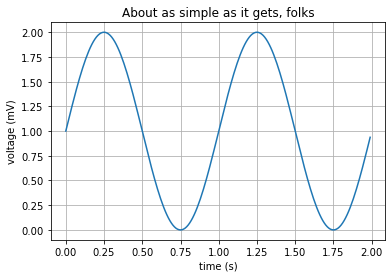

In [6]:
# create a sentiment plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png")
# plt.show()

9
706


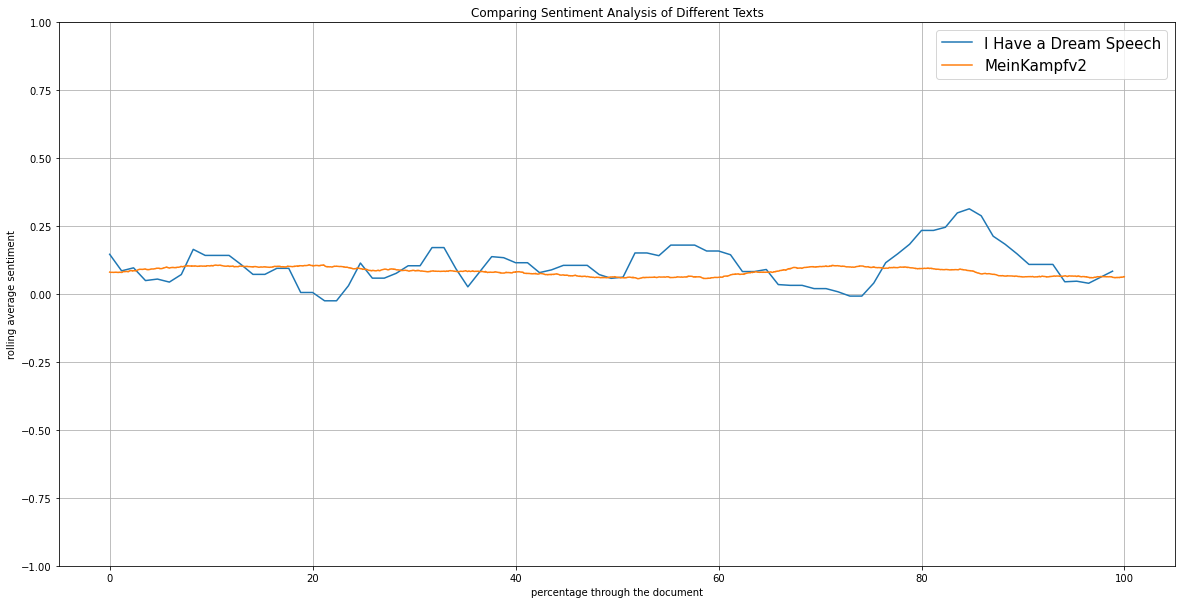

Wall time: 3.26 s


In [70]:
%%time
# https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

import matplotlib
import matplotlib.pyplot as plt
from collections import OrderedDict
from textblob import TextBlob
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

def smoothing(sentiment_list, window_size):
    window_size = window_size
    numbers_series = pd.Series(sentiment_list)
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()

    moving_averages_list = moving_averages.tolist()
    
    return moving_averages_list[window_size - 1:]

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def x_axis(sentiment_list):
    total_len = len(sentiment_list)
    return [(i / total_len)*100 for i in range(total_len)]

def textblob_sentiment(document):
    sentiment = list()
    max_values = list()
    min_values = list()
    max_value = ("", 0)
    min_value = ("", 0)
    
    for sentence in document.doc.sents:
        rawtext = sentence.text
        sentiment.extend([TextBlob(rawtext).sentiment[0]])
        if sentiment[-1] == 1:
            max_values.append((rawtext, sentiment[-1]))
        if sentiment[-1] == -1:
            min_values.append((rawtext, sentiment[-1]))
        if max(sentiment) < 1 and max(sentiment) > max_value[1]:
            max_value = (rawtext, sentiment[-1])
        if min(sentiment) > -1 and min(sentiment) < min_value[1]:
            min_value = (rawtext, sentiment[-1])
            
#     pd.set_option('display.max_columns', None)
#     display(pd.DataFrame(min_value))
        
    return sentiment

plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
axes = plt.gca()
axes.set_ylim([-1,1])
ax.grid()


def add_plot(text, window, poly):
    #y_axis = savgol_filter(get_sentiment(text), window, poly)
    print(len(text) // 1000)
    y_axis = smoothing(textblob_sentiment(text), len(text)//1000)
    
    ax.plot(x_axis(y_axis), y_axis, label = text.title)
    
    
window = 100
poly = 1
text = orators["king"][1]
add_plot(text, 20, poly)
text = orators["hitler"][0]
add_plot(text, 100, poly)

ax.legend(prop={"size":15})
ax.set(xlabel='percentage through the document', ylabel='rolling average sentiment',
       title="Comparing Sentiment Analysis of Different Texts")

plt.show()
    

In [10]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

text = "The leadership of al Qaeda has great influence in Afghanistan and supports the Taliban regime in controlling most of that country."
#text = "The evidence we have gathered all points to a collection of loosely affiliated terrorist organisations known as al Qaeda."

doc = nlp(text)

options = {"distance" : 90 }
displacy.render(doc, style = "dep", options = options)